<a href="https://colab.research.google.com/github/Drakensberge/crime_rates_data_commons/blob/master/CrimeRates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --upgrade -q datacommons
!pip install numpy
!pip install matplotlib

In [0]:
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt

# Crime rates on US north vs south border

I recently attended a great presentation by R.V. Guha on his work on [DataCommons](https://browser.datacommons.org/). This tool provides a single, uniform knowledge graph (with browser and API) for statistics from different datasets across different government agencies with different storage formats.

Recently, a prominent politician claimed that crime rates on the US/Mexico border towns were way up. In this notebook we explore
- Is this true?
- How does this compare with crimerates along the US/Canada border?
- How cool is datacommons?!

In [5]:
import datacommons

dc = datacommons.Client()

/usr/local/lib/python3.6/dist-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access datacommons_66054275879-a0nalqfe2p9shlv4jpra5jekfkfnr8ug.apps.googleusercontent.com.dat: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))



Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/v2/auth?client_id=66054275879-a0nalqfe2p9shlv4jpra5jekfkfnr8ug.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&access_type=offline&response_type=code&oauth_displayname=DataCommons+Python+Client

Enter verification code: 4/7QDo429JprKHTGwxDk5Eqr0cI5lY6NxLfRuFPiPLVbttRsAZMR-AByA
Authentication successful.


In [0]:
# A helper function that will display the head of each table
def print_head(label, table, rows=5):
    print(label)
    print(table.head(rows))

To get started, we'll need the cities. First, following these [tutorials](https://datacommons.org/colab), we lookup the dcid for the [United States](https://browser.datacommons.org/kg?dcid=dc/2sffw13&r=0). Then we create some tables and expand them to be more readable.

In [90]:
# TODO: remove
# Create a dataframe with the dcids of states, counties, and cities in the
# United States.
US_DCID = 'dc/2sffw13'

# Some constants for tweaking the query speeds in this notebook
MAX_STATE_ROWS = 100
MAX_COUNTY_ROWS = 3500
MAX_CITY_ROWS = 30000

states = dc.get_places_in(place_type='State',
                          container_dcid=US_DCID,  # United States
                          col_name='state')
print("Created table STATES with {} rows".format(states.shape[0]))

counties = dc.get_places_in(place_type='County',
                            container_dcid=US_DCID,
                            col_name='county',
                            max_rows=MAX_COUNTY_ROWS)
print("Created table COUNTIES with {} rows".format(counties.shape[0]))

cities = dc.get_places_in(place_type='City',
                          container_dcid=US_DCID,
                          col_name='city',
                          max_rows=MAX_CITY_ROWS)
print("Created table CITIES with {} rows".format(cities.shape[0]))

Created table STATES with 52 rows
Created table COUNTIES with 3220 rows
Created table CITIES with 26201 rows


In [91]:
# TODO: remove
# Get the names associated with each entity
states = dc.expand(states, 'name', 'state', 'name')
print_head('STATES table', states)

counties = dc.expand(counties, 'name', 'county', 'name', outgoing=True, max_rows=MAX_COUNTY_ROWS)
print_head('\nCOUNTIES table', counties)

cities = dc.expand(cities, 'name', 'city', 'name', outgoing=True, max_rows=MAX_CITY_ROWS)
print_head('\nCITIES table', cities)


STATES table
        state      name
0       State      Text
1  dc/11lqrr2  Missouri
2  dc/1c9wee1  Arkansas
3   dc/1hbcpn   Arizona
4   dc/23mkg1      Ohio

COUNTIES table
       county             name
0      County             Text
1  dc/03230v2     Wayne County
2  dc/016jhp2  Lares Municipio
3  dc/0378303   Wyoming County
4  dc/090nnv2  Garfield County

CITIES table
         city           name
0        City           Text
1   dc/002r1t  Grosse Pointe
2  dc/003m6z1     Winchester
3  dc/00482n1        Mettler
4  dc/00571p1        Lealman


In [102]:
cc = dc.get_cities('California', 'city', max_rows=MAX_CITY_ROWS)
cc = dc.expand(cc, 'name', 'city', 'name', outgoing=True, max_rows=MAX_CITY_ROWS)
print(cc.sort_values(by='name'))
print(cc.loc[cc['name'].isin(['San Diego','Calexico'])])

            city             name
992     dc/s62l9           Acampo
649    dc/zn7vbb            Acton
34    dc/8q8r143         Adelanto
810   dc/79trtb2     Agoura Hills
652    dc/zrtlg9       Agua Dulce
216   dc/lkg69b3          Aguanga
337   dc/jryp683         Ahwahnee
544    dc/49gr78          Alameda
585   dc/h1r6qn3            Alamo
783   dc/2jjlk53           Albany
239    dc/rt74zf           Albion
930   dc/776x273       Alderpoint
939   dc/8857lp2         Alhambra
888    dc/wrdffq      Aliso Viejo
497   dc/req9fk2          Almanor
1144  dc/vewewr2          Alpaugh
388    dc/x22c0q           Alpine
1174  dc/467jh53   Alpine Village
719    dc/lmn3bh             Alta
872     dc/sespz      Alta Sierra
271   dc/1kr2ns3         Altadena
952   dc/dt435e1          Alturas
1142   dc/t9bmgx        Alum Rock
1206  dc/grp1rm3      Amador City
400   dc/0340691  American Canyon
793    dc/3whtgb           Amesti
141   dc/1ee7sm1          Anaheim
545   dc/4edmc81       Anchor Bay
1103  dc/jqx47

Next we filter down to cities that border Mexico and cities that border Canada. From [Wikipedia](https://en.wikipedia.org/wiki/Border_town#United_States/Mexico), the border towns are as follows


In [0]:

bordertowns_ca = """Hyder, Alaska and Stewart, British Columbia
Point Roberts, Washington and Tsawwassen, British Columbia
Blaine, Washington and Surrey, British Columbia
Sumas, Washington and Abbotsford, British Columbia
Sweetgrass, Montana and Coutts, Alberta
Portal, North Dakota and North Portal, Saskatchewan
Pembina, North Dakota and Emerson, Manitoba
Noyes, Minnesota and Emerson, Manitoba
Baudette, Minnesota and Rainy River, Ontario
International Falls, Minnesota and Fort Frances, Ontario
Sault Ste. Marie, Michigan and Sault Ste. Marie, Ontario
Port Huron, Michigan and Sarnia, Ontario
Detroit, Michigan and Windsor, Ontario
Buffalo, New York and Fort Erie, Ontario
Niagara Falls, New York and Niagara Falls, Ontario
Lewiston, New York and Queenston, Ontario
Cape Vincent, New York and Wolfe Island, Ontario
Ogdensburg, New York and Prescott, Ontario
Massena, New York and Cornwall, Ontario
Derby Line, Vermont and Rock Island, Quebec
Norton, Vermont and Stanhope, Quebec
Estcourt Station, Maine and Pohénégamook, Quebec
Fort Kent, Maine and Clair, New Brunswick
Madawaska, Maine and Edmundston, New Brunswick
Van Buren, Maine and St. Leonard, New Brunswick
Houlton, Maine and Woodstock, New Brunswick
Vanceboro, Maine and St. Croix, New Brunswick
Calais, Maine and St. Stephen, New Brunswick
Eastport, Maine and Deer Island, New Brunswick
Lubec, Maine and Campobello Island, New Brunswick"""

bordertowns_mx = """San Diego, California and Tijuana, Baja California
Tecate, Baja California
Calexico, California and Mexicali, Baja California
Los Algodones, Baja California
San Luis, Arizona and San Luis Río Colorado, Sonora
Sonoyta, Sonora
Nogales, Arizona and Nogales, Sonora
Douglas, Arizona and Agua Prieta, Sonora
Columbus, New Mexico and Puerto Palomas, Chihuahua
El Paso, Texas and Ciudad Juárez, Chihuahua
Edinburg, Texas
Socorro, Texas
San Elizario, Texas
Brownsville, Texas and Matamoros, Tamaulipas
Del Rio, Texas and Ciudad Acuña, Coahuila
Eagle Pass, Texas and Piedras Negras, Coahuila
Presidio, Texas and Ojinaga, Chihuahua
Hidalgo, Texas and Reynosa, Tamaulipas
Laredo, Texas and Nuevo Laredo, Tamaulipas
El Cenizo, Texas
Roma, Texas and Ciudad Miguel Alemán, Tamaulipas
Escobares, Texas
Rio Grande City, Texas
La Grulla, Texas
Hidalgo, Texas and Reynosa, Tamaulipas
Progreso Lakes, Texas and Nuevo Progreso, Río Bravo, Tamaulipas
Brownsville, Texas and Matamoros, Tamaulipas"""
bordertowns_ca = bordertowns_ca.split('\n')
bordertowns_ca = [row.split(' and')[0].split(', ') for row in bordertowns_ca]
bordertowns_mx = bordertowns_mx.split('\n')
bordertowns_mx = [row.split(' and')[0].split(', ') for row in bordertowns_mx]

In [74]:
import pandas as pd

bordertowns_ca = pd.DataFrame(bordertowns_ca, columns=['City', "State"])
bordertowns_mx = pd.DataFrame(bordertowns_mx, columns=['City', "State"])

print(bordertowns_ca.head())
print(bordertowns_mx.head())

            City       State
0          Hyder      Alaska
1  Point Roberts  Washington
2         Blaine  Washington
3          Sumas  Washington
4     Sweetgrass     Montana
            City            State
0      San Diego       California
1         Tecate  Baja California
2       Calexico       California
3  Los Algodones  Baja California
4       San Luis          Arizona


In [109]:
print(bordertowns_mx.shape)
print(bordertowns_ca.shape)

(27, 2)
(30, 2)


In [0]:
border_states_mx = ['California', 'Arizona', 'New Mexico', 'Texas']
border_states_ca = 'Alaska, Washington, Idaho, Montana, North Dakota, Minnesota, Michigan, Ohio, Pennsylvania, New York, Vermont, New Hampshire, Maine'.split(', ')


In [103]:
city_state_mx = {}
for state in border_states_mx:
  c = dc.get_cities(state, 'city', max_rows=MAX_CITY_ROWS)
  c = dc.expand(c, 'name', 'city', 'name', outgoing=True, max_rows=MAX_CITY_ROWS)
  c['Statename'] = state
  c['Neighbor'] = 'Mexico'
  city_state_mx[state]= c.iloc[1:]
  print(city_state_mx[state].head())

         city         name   Statename Neighbor
1  dc/08v06x2  Lake Hughes  California   Mexico
2  dc/0pev8n1    June Lake  California   Mexico
3  dc/16ws7j3      La Vina  California   Mexico
4  dc/1bs7t83    Templeton  California   Mexico
5  dc/1ctcte2      Redding  California   Mexico
         city               name Statename Neighbor
1  dc/09be4l1  Black Canyon City   Arizona   Mexico
2  dc/1211wn2   Corona de Tucson   Arizona   Mexico
3   dc/156csc             Marana   Arizona   Mexico
4  dc/1tbzp42    Prescott Valley   Arizona   Mexico
5  dc/22lbvr1          Wide Ruin   Arizona   Mexico
         city         name   Statename Neighbor
1  dc/03hy233        Duran  New Mexico   Mexico
2  dc/2gqltt2  White Sands  New Mexico   Mexico
3  dc/2mbylp3        Alamo  New Mexico   Mexico
4  dc/32t6c71   Fence Lake  New Mexico   Mexico
5  dc/3tjxm51     McIntosh  New Mexico   Mexico
         city            name Statename Neighbor
1   dc/01tfxp           Kress     Texas   Mexico
2   dc/02p23w 

In [104]:
city_state_ca = {}
for state in border_states_ca:
  c = dc.get_cities(state, 'city', max_rows=MAX_CITY_ROWS)
  c = dc.expand(c, 'name', 'city', 'name', outgoing=True, max_rows=MAX_CITY_ROWS)
  c['Statename'] = state
  c['Neighbor'] = 'Canada'
  city_state_ca[state]= c.iloc[1:]
  print(city_state_ca[state].head())

         city        name Statename Neighbor
1   dc/08kcll    Kotzebue    Alaska   Canada
2  dc/08mfe82  Kongiganak    Alaska   Canada
3  dc/0e8j263  Game Creek    Alaska   Canada
4  dc/1wr7cy2     Takotna    Alaska   Canada
5  dc/378fq22   Napaskiak    Alaska   Canada
         city                      name   Statename Neighbor
1  dc/01b0y93  Fairchild Air Force Base  Washington   Canada
2  dc/02jjpn3                 Centralia  Washington   Canada
3  dc/0378q22                     Selah  Washington   Canada
4  dc/04nsx03                    Bucoda  Washington   Canada
5  dc/0bn9sx2                Lake Shore  Washington   Canada
         city       name Statename Neighbor
1  dc/1qg2wg3  Richfield     Idaho   Canada
2  dc/7e4bl52   Kimberly     Idaho   Canada
3   dc/7l41ml     Downey     Idaho   Canada
4  dc/dg8sj73   Hazelton     Idaho   Canada
5  dc/dnyekd1    Acequia     Idaho   Canada
         city         name Statename Neighbor
1  dc/13mgb11          Wye   Montana   Canada
2  dc/1r

In [115]:
mx_df = pd.concat(list(city_state_mx.values()))
new_mx_df = pd.merge(bordertowns_mx, mx_df,  how='inner', 
                  left_on=['City','State'], right_on = ['name','Statename'])
print(new_mx_df)

               City       State        city             name   Statename  \
0         San Diego  California  dc/w5qtrz2        San Diego  California   
1          Calexico  California  dc/27lcem1         Calexico  California   
2          San Luis     Arizona  dc/fw8tss1         San Luis     Arizona   
3           Nogales     Arizona  dc/n1b5vr3          Nogales     Arizona   
4           Douglas     Arizona  dc/845fls3          Douglas     Arizona   
5          Columbus  New Mexico  dc/h9nd022         Columbus  New Mexico   
6           El Paso       Texas  dc/bflt9z1          El Paso       Texas   
7          Edinburg       Texas  dc/ty55662         Edinburg       Texas   
8           Socorro       Texas  dc/d47r653          Socorro       Texas   
9      San Elizario       Texas  dc/q08rl51     San Elizario       Texas   
10      Brownsville       Texas  dc/vmh4zx1      Brownsville       Texas   
11      Brownsville       Texas  dc/vmh4zx1      Brownsville       Texas   
12          

In [112]:
ca_df = pd.concat(list(city_state_ca.values()))
new_ca_df = pd.merge(bordertowns_ca, ca_df,  how='inner', 
                  left_on=['City','State'], right_on = ['name','Statename'])
print(new_ca_df)

                   City         State        city                 name  \
0                 Hyder        Alaska  dc/jrnek91                Hyder   
1         Point Roberts    Washington   dc/emt178        Point Roberts   
2                Blaine    Washington  dc/b5z6sf2               Blaine   
3                 Sumas    Washington  dc/ff7wx92                Sumas   
4                Portal  North Dakota   dc/w71bwl               Portal   
5               Pembina  North Dakota  dc/pfhfxy3              Pembina   
6              Baudette     Minnesota   dc/56sygc             Baudette   
7   International Falls     Minnesota  dc/rdxy822  International Falls   
8      Sault Ste. Marie      Michigan  dc/d8ctlf1     Sault Ste. Marie   
9            Port Huron      Michigan  dc/0lbp251           Port Huron   
10              Detroit      Michigan   dc/xt37js              Detroit   
11              Buffalo      New York  dc/qd88zk1              Buffalo   
12        Niagara Falls      New York 

OK not bad, we lost a few rows where the towns had variants on the names. If you want to go look deeper, you'll see there wasnt' much data there. This could be a good exercise to fill inthe data at a later stage. The ones we lost for Mexico are actually in Mexico. So we're in pretty good shape.

Now we are ready to pull the crime stats for each of these towns. The key part of all of this munging was to get the dcid for them.


In [162]:
df = pd.concat([new_mx_df, new_ca_df])
fun_row = [{'City': 'Text', 
            'State': 'Text', 
            'city': 'City', 
            'name': 'Text', 
            'Statename': 'Text', 
            'Neighbor': 'Text'}]
df = pd.concat([pd.DataFrame(fun_row), df], ignore_index=True)
print(df)

                   City Neighbor         State     Statename        city  \
0                  Text     Text          Text          Text        City   
1             San Diego   Mexico    California    California  dc/w5qtrz2   
2              Calexico   Mexico    California    California  dc/27lcem1   
3              San Luis   Mexico       Arizona       Arizona  dc/fw8tss1   
4               Nogales   Mexico       Arizona       Arizona  dc/n1b5vr3   
5               Douglas   Mexico       Arizona       Arizona  dc/845fls3   
6              Columbus   Mexico    New Mexico    New Mexico  dc/h9nd022   
7               El Paso   Mexico         Texas         Texas  dc/bflt9z1   
8              Edinburg   Mexico         Texas         Texas  dc/ty55662   
9               Socorro   Mexico         Texas         Texas  dc/d47r653   
10         San Elizario   Mexico         Texas         Texas  dc/q08rl51   
11          Brownsville   Mexico         Texas         Texas  dc/vmh4zx1   
12          

### Querying for Population and Crime Statistics

Let's start querying the statistics. We want the total population of each town and the incidence of crime.s This [notebook](https://colab.research.google.com/drive/1vffnWktZyffk7pNfpuXrTsCpp-od5W47) explains how to query for StatisticalPopulations and Observations. 

In [0]:
dfno = df.copy(deep=True)

In [0]:
# Unemployment statistics
df = dfno.copy(deep=True)
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Person/Unemployment',
                          population_type='Person',
                          max_rows=5000,
                          employmentStatus='Unemployed')
df = dc.get_observations(pd_table=df,
                           seed_col_name='Person/Unemployment',
                           new_col_name='Unemployment',
                           start_date='2018-01-01',
                           end_date='2018-01-01',
                           measured_property='percent',
                           max_rows=5000)
# Population count
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Person',
                          population_type='Person',
                          max_rows=5000)
df = dc.get_observations(pd_table=df,
                           seed_col_name='Person',
                           new_col_name='Population',
                           start_date='2011-01-01',
                           end_date='2015-01-01',
                           measured_property='count',
                           max_rows=5000)

In [170]:
df.head(100)

,City,Neighbor,State,Statename,city,name,Person/Unemployment,Unemployment,Person,Population
0,Text,Text,Text,Text,City,Text,StatisticalPopulation,Observation,StatisticalPopulation,Observation
1,San Diego,Mexico,California,California,dc/w5qtrz2,San Diego,dc/p/jd30mqe3bmskc,3.6,dc/p/kqle4fjkgkf8,
2,Calexico,Mexico,California,California,dc/27lcem1,Calexico,dc/p/1d7kvz2bfgmnf,24.5,dc/p/9d1p72mp08sp5,
3,San Luis,Mexico,Arizona,Arizona,dc/fw8tss1,San Luis,dc/p/ghxnd3y38dj8c,26.7,dc/p/2x56zssc10ye5,
4,Nogales,Mexico,Arizona,Arizona,dc/n1b5vr3,Nogales,,,dc/p/es0jnc783zpsd,
5,Douglas,Mexico,Arizona,Arizona,dc/845fls3,Douglas,,,dc/p/f9ftnzp81f7ec,
6,Columbus,Mexico,New Mexico,New Mexico,dc/h9nd022,Columbus,,,dc/p/3cew939qfnkz5,
7,El Paso,Mexico,Texas,Texas,dc/bflt9z1,El Paso,dc/p/33bqv22f967xc,4.4,dc/p/ntm8nw1cf2m29,
8,Edinburg,Mexico,Texas,Texas,dc/ty55662,Edinburg,dc/p/v23qkbqtc3gd5,5.2,dc/p/1whv9r62ce1md,
9,Socorro,Mexico,Texas,Texas,dc/d47r653,Socorro,dc/p/4qd1kxlx1jy06,4.6,dc/p/fhrp89p1wjr7,


In [0]:
# Prevalence of crime
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Crimes',
                          population_type='CriminalActivities',
                          max_rows=5000)
df = dc.get_observations(pd_table=df,
                           seed_col_name='Crimes',
                           new_col_name='CriminalActivities',
                           start_date='2015-01-01',
                           end_date='2015-01-01',
                           measured_property='count',
                           max_rows=5000)


In [0]:
# Prevalence of crime
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Crimes2016',
                          population_type='CriminalActivities',
                          max_rows=5000)
df = dc.get_observations(pd_table=df,
                           seed_col_name='Crimes2016',
                           new_col_name='CriminalActivities2016',
                           start_date='2016-01-01',
                           end_date='2016-01-01',
                           measured_property='count',
                           max_rows=5000)

In [0]:
# Prevalence of crime
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Crimes2017',
                          population_type='CriminalActivities',
                          max_rows=5000)
df = dc.get_observations(pd_table=df,
                           seed_col_name='Crimes2017',
                           new_col_name='CriminalActivities2017',
                           start_date='2017-01-01',
                           end_date='2017-01-01',
                           measured_property='count',
                           max_rows=5000)

In [0]:
# Prevalence of crime
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Crimes2018',
                          population_type='CriminalActivities',
                          max_rows=5000)
df = dc.get_observations(pd_table=df,
                           seed_col_name='Crimes2017',
                           new_col_name='CriminalActivities2018',
                           start_date='2018-01-01',
                           end_date='2018-01-01',
                           measured_property='count',
                           max_rows=5000)

In [0]:
# Population count
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Person2015',
                          population_type='Person',
                          max_rows=5000)
df = dc.get_observations(pd_table=df,
                           seed_col_name='Person2015',
                           new_col_name='Population2015',
                           start_date='2015-01-01',
                           end_date='2015-01-01',
                           measured_property='count',
                           max_rows=5000)
# Population count
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Person2016',
                          population_type='Person',
                          max_rows=5000)
df = dc.get_observations(pd_table=df,
                           seed_col_name='Person2016',
                           new_col_name='Population2016',
                           start_date='2016-01-01',
                           end_date='2016-01-01',
                           measured_property='count',
                           max_rows=5000)

# Population count
df = dc.get_populations(pd_table=df,
                          seed_col_name='city',
                          new_col_name='Person2017',
                          population_type='Person',
                          max_rows=5000)
df = dc.get_observations(pd_table=df,
                           seed_col_name='Person2017',
                           new_col_name='Population2017',
                           start_date='2017-01-01',
                           end_date='2017-01-01',
                           measured_property='count',
                           max_rows=5000)

In [184]:
df.head(100)

,City,Neighbor,State,Statename,city,name,Person/Unemployment,Unemployment,Person,Population,...,Crimes2017,CriminalActivities2017,Crimes2018,CriminalActivities2018,Person2015,Population2015,Person2016,Population2016,Person2017,Population2017
0,Text,Text,Text,Text,City,Text,StatisticalPopulation,Observation,StatisticalPopulation,Observation,...,StatisticalPopulation,Observation,StatisticalPopulation,Observation,StatisticalPopulation,Observation,StatisticalPopulation,Observation,StatisticalPopulation,Observation
1,San Diego,Mexico,California,California,dc/w5qtrz2,San Diego,dc/p/jd30mqe3bmskc,3.6,dc/p/kqle4fjkgkf8,1.35979e+06,...,dc/p/vrt32fpkd79t8,31467,dc/p/vrt32fpkd79t8,,dc/p/kqle4fjkgkf8,1.35979e+06,dc/p/kqle4fjkgkf8,1.37481e+06,dc/p/kqle4fjkgkf8,1.39097e+06
2,Calexico,Mexico,California,California,dc/27lcem1,Calexico,dc/p/1d7kvz2bfgmnf,24.5,dc/p/9d1p72mp08sp5,39601,...,dc/p/k0760eg1ejgyb,1369,dc/p/k0760eg1ejgyb,,dc/p/9d1p72mp08sp5,39601,dc/p/9d1p72mp08sp5,39750,dc/p/9d1p72mp08sp5,39953
3,San Luis,Mexico,Arizona,Arizona,dc/fw8tss1,San Luis,dc/p/ghxnd3y38dj8c,26.7,dc/p/2x56zssc10ye5,30658,...,dc/p/s59ldrrwmkpmf,567,dc/p/s59ldrrwmkpmf,,dc/p/2x56zssc10ye5,30658,dc/p/2x56zssc10ye5,31118,dc/p/2x56zssc10ye5,31509
4,Nogales,Mexico,Arizona,Arizona,dc/n1b5vr3,Nogales,,,dc/p/es0jnc783zpsd,20601,...,dc/p/7hvhywtfkl1x9,616,dc/p/7hvhywtfkl1x9,,dc/p/es0jnc783zpsd,20601,dc/p/es0jnc783zpsd,20355,dc/p/es0jnc783zpsd,20233
5,Douglas,Mexico,Arizona,Arizona,dc/845fls3,Douglas,,,dc/p/f9ftnzp81f7ec,16911,...,dc/p/3enbd63r573q5,698,dc/p/3enbd63r573q5,,dc/p/f9ftnzp81f7ec,16911,dc/p/f9ftnzp81f7ec,16764,dc/p/f9ftnzp81f7ec,16576
6,Columbus,Mexico,New Mexico,New Mexico,dc/h9nd022,Columbus,,,dc/p/3cew939qfnkz5,1265,...,,,,,dc/p/3cew939qfnkz5,1265,dc/p/3cew939qfnkz5,1244,dc/p/3cew939qfnkz5,
7,El Paso,Mexico,Texas,Texas,dc/bflt9z1,El Paso,dc/p/33bqv22f967xc,4.4,dc/p/ntm8nw1cf2m29,676325,...,dc/p/32lb1hzc1ghwd,15135,dc/p/32lb1hzc1ghwd,,dc/p/ntm8nw1cf2m29,676325,dc/p/ntm8nw1cf2m29,678058,dc/p/ntm8nw1cf2m29,678266
8,Edinburg,Mexico,Texas,Texas,dc/ty55662,Edinburg,dc/p/v23qkbqtc3gd5,5.2,dc/p/1whv9r62ce1md,80924,...,dc/p/ycttngsw3dgy8,3672,dc/p/ycttngsw3dgy8,,dc/p/1whv9r62ce1md,80924,dc/p/1whv9r62ce1md,84399,dc/p/1whv9r62ce1md,86123
9,Socorro,Mexico,Texas,Texas,dc/d47r653,Socorro,dc/p/4qd1kxlx1jy06,4.6,dc/p/fhrp89p1wjr7,32877,...,dc/p/9nv9e0kzgmg0b,341,dc/p/9nv9e0kzgmg0b,,dc/p/fhrp89p1wjr7,32877,dc/p/fhrp89p1wjr7,32988,dc/p/fhrp89p1wjr7,33587


### Cleaning the Data

Great! We have all the statistics we'll need for this case study queried from three different data sources without having to write additional code to perform the joins. However, we'll still need to perform three data cleanup tasks to prepare the data for analysis:

1. Select the column of city names and all observation columns.
2. Convert the observation columns to numerical types. Since dataCommons is still in its early release stage, there are a couple of oddities such as how numerical observations are stored as text values!
3. Remove any missing rows with missing values.

Let's generate the final dataframe.

In [0]:
def select_and_clean(df, info_cols, data_cols):
    """ Selects columns in INFO_COLS + DATA_COLS from DF and performs cleanup 
    tasks described above:
    - Remove top row
    - Convert DATA_COLS to numerical types.
    - Remove rows with missing statistics.
    """
    table = df[1:][info_cols + data_cols].copy()
    table[data_cols] = table[data_cols].apply(pd.to_numeric, errors='coerce')
    table = table.dropna()
    return table

In [198]:
print(df.columns)

Index(['City', 'Neighbor', 'State', 'Statename', 'city', 'name',
       'Person/Unemployment', 'Unemployment', 'Person', 'Population', 'Crimes',
       'CriminalActivities', 'Crimes2016', 'CriminalActivities2016',
       'Crimes2017', 'CriminalActivities2017', 'Crimes2018',
       'CriminalActivities2018', 'Person2015', 'Population2015', 'Person2016',
       'Population2016', 'Person2017', 'Population2017'],
      dtype='object')


In [212]:
# Get the cleaned table
cleaned = df.copy()
cleaned = select_and_clean(df, ['City', 'State', 'Neighbor'], ['CriminalActivities','CriminalActivities2016','CriminalActivities2017','Population2015', 'Population2016', 'Population2017'])


,City,State,Neighbor,CriminalActivities,CriminalActivities2016,CriminalActivities2017,Population2015,Population2016,Population2017
1,San Diego,California,Mexico,34740.0,33956.0,31467.0,1359790.0,1374810.0,1390970.0
2,Calexico,California,Mexico,1736.0,1431.0,1369.0,39601.0,39750.0,39953.0
3,San Luis,Arizona,Mexico,467.0,466.0,567.0,30658.0,31118.0,31509.0
4,Nogales,Arizona,Mexico,571.0,564.0,616.0,20601.0,20355.0,20233.0
7,El Paso,Texas,Mexico,15648.0,15039.0,15135.0,676325.0,678058.0,678266.0


In [213]:
#cleaned['PovertyRate'] = cleaned['Poverty'] / cleaned['Population'] * 100
cleaned.head(100)

,City,State,Neighbor,CriminalActivities,CriminalActivities2016,CriminalActivities2017,Population2015,Population2016,Population2017
1,San Diego,California,Mexico,34740.0,33956.0,31467.0,1359790.0,1374810.0,1390970.0
2,Calexico,California,Mexico,1736.0,1431.0,1369.0,39601.0,39750.0,39953.0
3,San Luis,Arizona,Mexico,467.0,466.0,567.0,30658.0,31118.0,31509.0
4,Nogales,Arizona,Mexico,571.0,564.0,616.0,20601.0,20355.0,20233.0
7,El Paso,Texas,Mexico,15648.0,15039.0,15135.0,676325.0,678058.0,678266.0
8,Edinburg,Texas,Mexico,4435.0,4537.0,3672.0,80924.0,84399.0,86123.0
9,Socorro,Texas,Mexico,389.0,347.0,341.0,32877.0,32988.0,33587.0
11,Brownsville,Texas,Mexico,8158.0,6476.0,5652.0,181487.0,182110.0,182083.0
12,Brownsville,Texas,Mexico,8158.0,6476.0,5652.0,181487.0,182110.0,182083.0
13,Del Rio,Texas,Mexico,1055.0,902.0,721.0,36119.0,36007.0,35951.0


### Exploring the Data

Now's a good time to explore how each variable (high blood pressure prevalence, unemployment rate, and poverty rate) correlate with obesity prevalence. As stated before, previous research has shown that each of these variables tend to correlate positively with the prevalence of Obesity. Does our data show this?

[]

<Figure size 432x288 with 0 Axes>

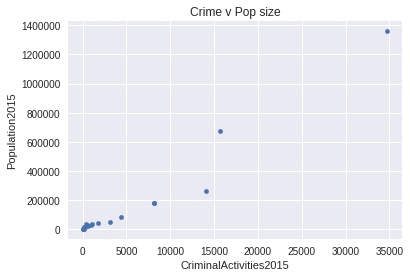

In [216]:
# Plot Bphigh vs. Obesity
cleaned = cleaned.rename(columns={"CriminalActivities": "CriminalActivities2015"})
plt.figure(figsize=(6,4))
cleaned.plot.scatter(x='CriminalActivities2015', y='Population2015')
plt.title('Crime v Pop size')
plt.plot()

[]

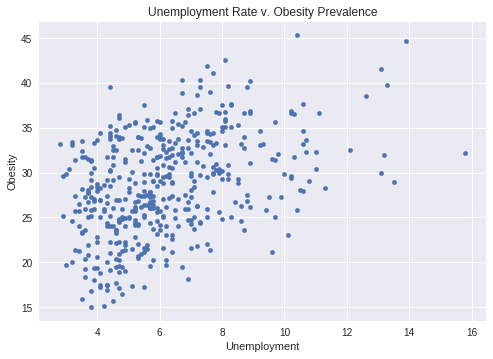

In [0]:
# Plot Unemployment with Obesity
plt.figure(figsize=(6,4))
cleaned.plot.scatter(x='Unemployment', y='Obesity')
plt.title('Unemployment Rate v. Obesity Prevalence')
plt.plot()

[]

<Figure size 432x288 with 0 Axes>

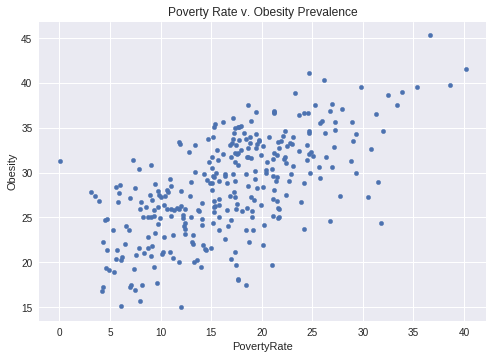

In [0]:
# Plot PovertyRate with Obesity
plt.figure(figsize=(6,4))
cleaned.plot.scatter(x='PovertyRate', y='Obesity')
plt.title('Poverty Rate v. Obesity Prevalence')
plt.plot()

Looks like each of variable does correlate positively with obesity prevalence.

### Modeling the Data

We'll be predicting the prevalence of obesity with the following linear model.

<br>
$$f_\theta(x) = \theta_0 + \theta_1 (\text{high blood pressure}) + \theta_2 (\text{unemployment}) + \theta_3(\text{poverty rate})$$
<br>

Let's start by creating our training and test sets. We'll then train a linear regression model using Scikit learn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [0]:
X = cleaned[['Bphigh', 'Unemployment', 'PovertyRate']]
Y = cleaned[['Obesity']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

print('Model Intercept: {}'.format(model.intercept_))
print('Model Coefficients: {}'.format(model.coef_))

Model Intercept: [4.68518704]
Model Coefficients: [[ 0.64371334 -0.01763077  0.30775913]]


### Analyzing the Model

We now have a trained model, but how well does it perform?

In [0]:
def mse(y_pred, y_true):
    """ Compute the mean squared error of 'y_pred' and 'y_true'. """
    return float(np.sum((y_pred - y_true) ** 2)) / len(y_pred)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print('Training Error: {}'.format(mse(train_pred, y_train)))
print('Test Error: {}'.format(mse(test_pred, y_test)))

Training Error: 11.240566553201505
Test Error: 10.346239498614228


We can also display a plot of the residuals

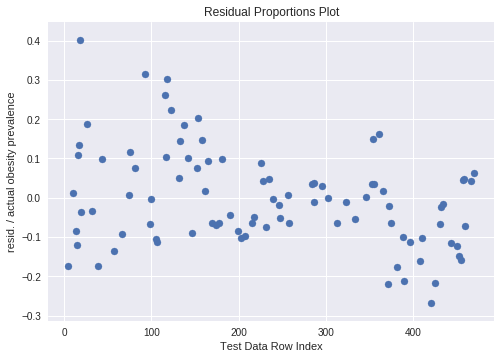

In [0]:
y_res = (test_pred - y_test) / y_test

# Plot the results
plt.title("Residual Proportions Plot")
plt.xlabel("Test Data Row Index")
plt.ylabel("resid. / actual obesity prevalence")
plt.scatter(y_res.index, y_res['Obesity'])
plt.show()

How well does your model perform? We were able to achieve an MSE for the test set of approximately 10% points from the observed obesity prevalence. Our model was also able to fit the data with the max residual bounded by +/- 30%, which for a simple model considering only three explanatory variables isn't so bad.

## Conclusion

Congratulations! Rather than spending a couple of hours just searching for and joining datasets from the CDC, Bureau of Labor Statistics, and US Census Bureau, you've spent one lab session querying dataCommons for the same data and, on top of that, using it to build a linear model. Hopefully dataCommons has made the time-to-analysis much shorter! 

You've also created a basic model to predict the prevalence of obesity in approximately 500 states using intuition from a long line of research. The model you've created only uses three explanatory variables, so even though it's not the most accurate at predicting obesity prevalence, it's possible that it can be improved by adding more variables. Obesity is also known to correlate with factors such as [high cholesterol](https://browser.datacommons.org/kg?dcid=dc/p/mml5nvjzeevbb&r=0) and [diabetes](https://browser.datacommons.org/kg?dcid=dc/p/mml5nvjzeevbb&r=0), but with the data in dataCommons, we can even consider asking if obesity correlates with stranger factors such as

- How many universities recognized by [collegescorecard](https://collegescorecard.ed.gov/data/) dataset are contained in a given city 
- The incidence rate of property arson
- The average snowfall in inches

Does adding these variables into your model improve accuracy? Can you think of other variables that correlate with obesity? 